In [9]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [3]:


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # Compute distances and get the indices of the k closest neighbors
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in indices]

        # Majority vote: Find the most common class label
        most_common_label, _ = Counter(k_nearest_labels).most_common(1)[0]

        return most_common_label
  

In [5]:
data=pd.read_csv('Q1Data.csv')
selected_features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6','MFCCs_ 7','MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13','MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19','MFCCs_20', 'MFCCs_21']
X = data[selected_features]
Y= data['Genus']
print(X.shape)
print(Y.shape)
le = LabelEncoder()
Y = le.fit_transform(Y)
X = X.to_numpy()
print(X.shape)

# lets normalize the data for X directly X-mean/std
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)






(7195, 21)
(7195,)
(7195, 21)
(7195, 21)


#### Write  a  code  from  scratch  which  predicts  the  Genus  using  the  kNN classifier using all the 21 features.

In [8]:
knn= KNN(k=5)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
# print(X.shape)
# print(X_train.shape)
# print(X_test.shape)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = np.sum(y_pred == y_test)/len(y_test)
print(acc)

0.9812369701181376


#### Extract 30 % of the dataset for the reference/training dataset  and  10%  as  test  dataset.  You  do  not  require  to  use  the  entire  dataset  for  this  question.  Plot  the  test  accuracy  for  k  ranging from 1,2.....,50.

In [10]:
# Split the dataset into training (30%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, train_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)


(2158, 21)
(720, 21)


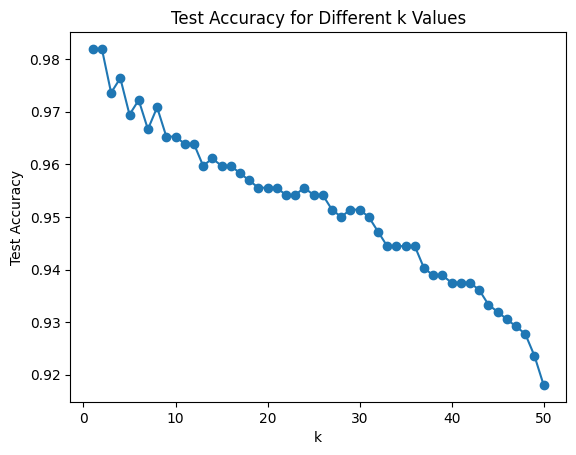

In [11]:
# Initialize lists to store accuracy values
k_values = list(range(1, 51))
accuracy_values = []

# Loop through k values
for k in k_values:
    # Initialize KNN classifier with current k value
    knn = KNN(k=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predictions on the test data
    predictions = knn.predict(X_test)

    # Calculate accuracy and store it
    acc = np.sum(y_test == predictions) / len(y_test)
    accuracy_values.append(acc)

# Plot the test accuracy for different k values
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Test Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.show()


 #### Report your observations from the above graph

When using a modest number of neighbors (around 5-10) in the k-nearest neighbors model, accuracy tends to be favorable. This is because the model benefits from capturing local patterns without being overly influenced by noise in the data. However, as the value of k increases, accuracy starts to decline. This decrease occurs because a larger k implies a broader neighborhood, leading to oversmoothing and a loss of sensitivity to local variations. Hence, striking a balance in choosing k is crucial, ensuring that it's sufficiently small to capture local patterns while avoiding excessive smoothing that can degrade accuracy.